## Process High Frequency Data:

A Zen file can be found in  data/time_series/zen/from_z3d.h5


In [1]:
# Required imports for the program. 
import numpy as np
from pathlib import Path
import pandas as pd
import warnings

from mth5.clients.make_mth5 import MakeMTH5
from mth5 import mth5, timeseries
from mth5.utils.helpers import initialize_mth5
from mt_metadata.utils.mttime import get_now_utc, MTime
from aurora.config import BANDS_DEFAULT_FILE
from aurora.config.config_creator import ConfigCreator
from aurora.pipelines.process_mth5 import process_mth5
from aurora.transfer_function.kernel_dataset import KernelDataset
from aurora.pipelines.run_summary import RunSummary

warnings.filterwarnings('ignore')

2022-10-16 18:24:26,935 [line 135] mth5.setup_logger - INFO: Logging file can be found /home/kkappler/software/irismt/mth5/logs/mth5_debug.log


## Set up the path to the file

In [2]:
here = Path(".")
data_dir = here.joinpath("../../data/time_series/zen")
mth5_path = data_dir.joinpath("from_z3d.h5")

mth5_path.exists()

True

In [3]:
mth5_object = initialize_mth5(mth5_path)

In [4]:
# Print some info about the mth5 
mth5_filename = mth5_object.filename
version = mth5_object.file_version
print(f" Filename: {mth5_filename} \n Version: {version}")

 Filename: ../../data/time_series/zen/from_z3d.h5 
 Version: 0.2.0


In [5]:
mth5_object.channel_summary.clear_table()
channel_summary = mth5_object.channel_summary.summarize()
channel_summary_df = mth5_object.channel_summary.to_dataframe()

In [6]:
channel_summary_df

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,yellowstone,wb280,sr1024_0001,44.147916,-111.049752,1954.239,ex,2017-07-01 02:19:59+00:00,2017-07-03 20:19:42+00:00,243284992,1024.0,electric,0.0,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,yellowstone,wb280,sr1024_0001,44.147916,-111.049752,1954.239,ey,2017-07-01 02:19:59+00:00,2017-07-03 20:19:42+00:00,243284992,1024.0,electric,90.0,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
2,yellowstone,wb280,sr1024_0001,44.147916,-111.049752,1954.239,hx,2017-07-01 02:19:59+00:00,2017-07-03 20:19:41.997070+00:00,243284989,1024.0,magnetic,0.0,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
3,yellowstone,wb280,sr1024_0001,44.147916,-111.049752,1954.239,hy,2017-07-01 02:19:59+00:00,2017-07-03 20:19:41.999023+00:00,243284991,1024.0,magnetic,90.0,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
4,yellowstone,wb280,sr1024_0001,44.147916,-111.049752,1954.239,hz,2017-07-01 02:19:59+00:00,2017-07-03 20:19:42+00:00,243284992,1024.0,magnetic,90.0,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
5,yellowstone,wb380,sr1024_0001,44.291193,-110.614549,2392.466,ex,2017-07-02 03:01:00+00:00,2017-07-05 16:24:42+00:00,314800128,1024.0,electric,0.0,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
6,yellowstone,wb380,sr1024_0001,44.291193,-110.614549,2392.466,ey,2017-07-02 03:01:00+00:00,2017-07-05 16:24:42+00:00,314800128,1024.0,electric,90.0,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
7,yellowstone,wb380,sr1024_0001,44.291193,-110.614549,2392.466,hx,2017-07-02 03:01:00+00:00,2017-07-05 16:24:42+00:00,314800128,1024.0,magnetic,0.0,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
8,yellowstone,wb380,sr1024_0001,44.291193,-110.614549,2392.466,hy,2017-07-02 03:01:00+00:00,2017-07-05 16:24:42+00:00,314800128,1024.0,magnetic,90.0,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
9,yellowstone,wb380,sr1024_0001,44.291193,-110.614549,2392.466,hz,2017-07-02 03:01:00+00:00,2017-07-05 16:24:41+00:00,314799104,1024.0,magnetic,90.0,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


##  Compress the Channel Summary to a RunSummary

In [7]:
mth5_run_summary = RunSummary()
mth5_run_summary.from_mth5s([mth5_path,])
run_summary = mth5_run_summary.clone()
run_summary.add_duration()

2022-10-16 18:24:27,421 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing ../../data/time_series/zen/from_z3d.h5


In [8]:
run_summary.df

,survey,station_id,run_id,start,end,sample_rate,input_channels,output_channels,channel_scale_factors,mth5_path,duration
0,yellowstone,wb280,sr1024_0001,2017-07-01 02:19:59+00:00,2017-07-03 20:19:42+00:00,1024.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",../../data/time_series/zen/from_z3d.h5,237583.0
1,yellowstone,wb380,sr1024_0001,2017-07-02 03:01:00+00:00,2017-07-05 16:24:42+00:00,1024.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",../../data/time_series/zen/from_z3d.h5,307422.0


In [9]:
run_summary.mini_summary

,survey,station_id,run_id,start,end
0,yellowstone,wb280,sr1024_0001,2017-07-01 02:19:59+00:00,2017-07-03 20:19:42+00:00
1,yellowstone,wb380,sr1024_0001,2017-07-02 03:01:00+00:00,2017-07-05 16:24:42+00:00


In [10]:
local_station_id = "wb280"
remote_station_id = "wb380"

In [11]:
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, local_station_id, remote_station_id)
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end,duration
0,yellowstone,wb280,sr1024_0001,2017-07-02 03:01:00+00:00,2017-07-03 20:19:42+00:00,148722.0
1,yellowstone,wb380,sr1024_0001,2017-07-02 03:01:00+00:00,2017-07-03 20:19:42+00:00,148722.0


Note how only the overlapping portions of the runs are kept

In [12]:
cc = ConfigCreator()
config = cc.create_from_kernel_dataset(kernel_dataset)

Bands not defined; setting to EMTF BANDS_DEFAULT_FILE
/home/kkappler/software/irismt/aurora/aurora/config/emtf_band_setup/bs_test.cfg
OK


In [13]:
for decimation in config.decimations:
    decimation.window.type = "hamming"

In [14]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )

2022-10-16 14:29:06,538 [line 2811] mth5.groups.master_station_run_channel.Magnetic.time_slice - ERROR: Requested slice is larger than data.  Slice length = 152291328, data length = (243284989,) Check start and end times.


ValueError: Requested slice is larger than data.  Slice length = 152291328, data length = (243284989,) Check start and end times.

Not sure what the issue is here, but maybe something to do with the vary large file.

In [2]:
slice_length = 152291328
data_length  = 243284989

A reasonable thing to try is to shorten the time window

In [12]:
kernel_dataset.df.start += pd.Timedelta("12h")  #Snip 6h off the front
kernel_dataset.df.end -= pd.Timedelta("12h")

In [13]:
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end,duration
0,yellowstone,wb280,sr1024_0001,2017-07-02 15:01:00+00:00,2017-07-03 08:19:42+00:00,148722.0
1,yellowstone,wb380,sr1024_0001,2017-07-02 15:01:00+00:00,2017-07-03 08:19:42+00:00,148722.0


In [14]:
cc = ConfigCreator()
config = cc.create_from_kernel_dataset(kernel_dataset)

Bands not defined; setting to EMTF BANDS_DEFAULT_FILE
/home/kkappler/software/irismt/aurora/aurora/config/emtf_band_setup/bs_test.cfg
OK


DATASET DF POPULATED
Processing config indicates 4 decimation levels 
DATASET DF UPDATED


2022-10-16 18:26:21,580 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:26:21,879 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:26:22,150 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:27:26,820 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:27:27,106 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:27:27,363 [line 222] mt_me

Processing band 0.025126s
Processing band 0.019462s
Processing band 0.014809s
Processing band 0.011471s
Processing band 0.008980s
Processing band 0.007190s
Processing band 0.005719s
Processing band 0.004573s


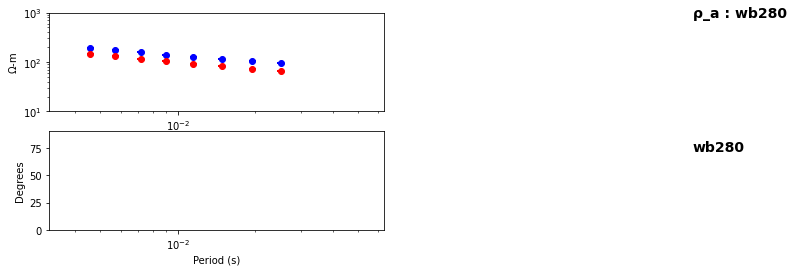

DECIMATION LEVEL 1
DATASET DF UPDATED


2022-10-16 18:46:15,738 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:46:15,832 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:46:15,932 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:46:26,768 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:46:26,856 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:46:26,944 [line 222] mt_me

Processing band 0.100504s
Processing band 0.083624s
Processing band 0.067267s
Processing band 0.052926s
Processing band 0.041996s
Processing band 0.032530s


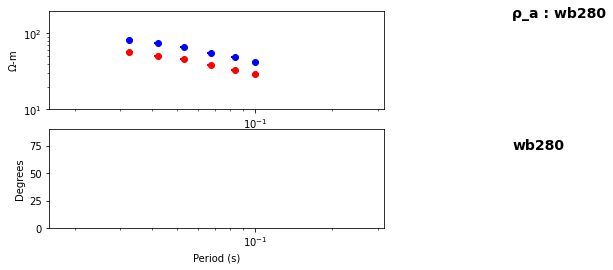

DECIMATION LEVEL 2
DATASET DF UPDATED


2022-10-16 18:48:30,932 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:48:30,994 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:48:31,056 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:48:34,259 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:48:34,322 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:48:34,393 [line 222] mt_me

Processing band 0.402015s
Processing band 0.334497s
Processing band 0.269069s
Processing band 0.211702s
Processing band 0.167984s
Processing band 0.130120s


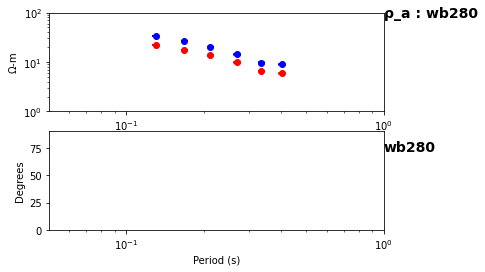

DECIMATION LEVEL 3
DATASET DF UPDATED


2022-10-16 18:49:14,489 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:49:14,544 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:49:14,599 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:49:15,667 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:49:15,726 [line 222] mt_metadata.base.metadata.frequency_response_table_filter.complex_response - WARNING: Extrapolating, use values outside calibration frequencies with caution
2022-10-16 18:49:15,837 [line 222] mt_me

Processing band 1.479201s
Processing band 1.018056s
Processing band 0.706417s
Processing band 0.520480s
Processing band 0.403162s


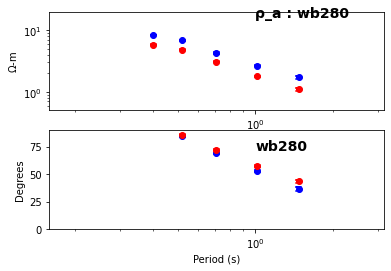

2022-10-16 18:49:32,208 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing ../../data/time_series/zen/from_z3d.h5
2022-10-16 18:49:32,283 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing ../../data/time_series/zen/from_z3d.h5


In [15]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )